# Modeling
## 1. Import cleaned data

In [49]:
import pandas as pd
import numpy as np
import sys, os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [80]:
data_path = os.path.join(os.getcwd(),'data')
train = pd.read_csv(os.path.join(data_path, "train.csv"))
# train = pd.read_csv(os.path.join(data_path, "train_resample.csv"))
test = pd.read_csv(os.path.join(data_path, "test.csv"))

# seperate features and response
X_train, Y_train = train.iloc[:,1:], train["loan_status"] 
X_test, Y_test = test.iloc[:,1:], test["loan_status"] 

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
def show_result(clf, X_train, Y_train, X_test, Y_test, pos_label):
    print("Accuracy on train set: {}".format(clf.score(X_train, Y_train)))
    print("Accuracy on test set: {}".format(clf.score(X_test, Y_test)))
    
    plot_confusion_matrix(clf, X_test, Y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 #normalize=normalize
                     )
    Y_pred = clf.predict(X_test)
    Matrix = confusion_matrix(Y_test, Y_pred)
    
    # calculate the result of classification
    result = pd.DataFrame([[-1,-1,-1,-1]],columns=["Accuracy", "Precision", "Recall", "F1-Score"])
    result["Accuracy"] = accuracy_score(Y_test, Y_pred)
    result["Precision"] = precision_score(Y_test, Y_pred, pos_label = pos_label)
    result["Recall"] = recall_score(Y_test, Y_pred, pos_label = pos_label)
    result["F1-Score"] = f1_score(Y_test, Y_pred, pos_label = pos_label)
    return result



## 2. logistic regression


Accuracy on train set: 0.8563574099092023
Accuracy on test set: 0.861631268065854


,Accuracy,Precision,Recall,F1-Score
0,0.861631,0.861631,1.0,0.925673


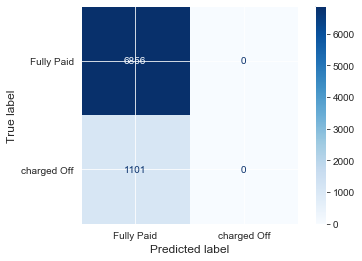

In [82]:
clf_logistic = LogisticRegression(n_jobs = -1).fit(X_train, Y_train)
show_result(clf_logistic,X_train,Y_train,X_test,Y_test, "Fully Paid")

In [ ]:
sum(Y_train == 1)/len(Y_train)

## 3.Decision Tree

Accuracy on train set: 1.0
Accuracy on test set: 0.7614678899082569


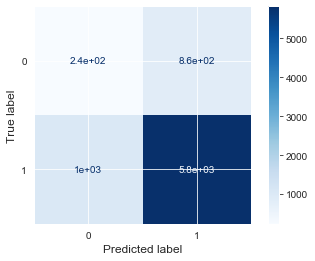

In [113]:
from sklearn import tree
clf_decisionTree = tree.DecisionTreeClassifier()
clf_decisionTree = clf_decisionTree.fit(X_train, Y_train)
show_result(clf_decisionTree,X_train,Y_train,X_test,Y_test)

## 4. Random Forest

Accuracy on train set: 0.9999685821106538
Accuracy on test set: 0.8610028905366344


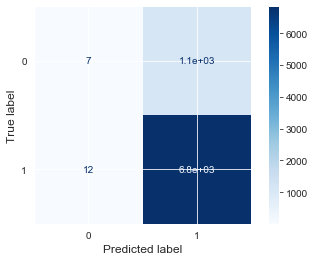

In [114]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_jobs = -1)
clf_rf.fit(X_train,Y_train)
show_result(clf_rf,X_train,Y_train,X_test,Y_test)

In [95]:
sum(Y_test == 1)/len(Y_test)

0.861631268065854

In [ ]:
clf_rf.